In [15]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pd.read_csv("C:/Users/ACER/Downloads/Freecode projects/medical_examination.csv.zip")

In [17]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [18]:
df["overweight"] = np.where(
    df["weight"] / (df["height"] * df["height"]) * 10000 > 25,
    1,
    0,
)

In [19]:
df["cholesterol"] = np.where(df["cholesterol"] == 1, 0, 1)
df["gluc"] = np.where(df["gluc"] == 1, 0, 1)

In [20]:
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from
    # 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    vars = sorted(
        ["cholesterol", "gluc", "smoke", "alco", "active", "overweight"]
    )

    df_cat = pd.melt(
        df,
        id_vars=["cardio"],
        value_vars=vars,
    )

    # Group and reformat the data to split it by 'cardio'. Show the counts of
    # each feature. You will have to rename one of the columns for the catplot
    # to work correctly.
    df_cat = df_cat.value_counts().reset_index(name="total")

    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(
        data=df_cat,
        x="variable",
        y="total",
        hue="value",
        col="cardio",
        kind="bar",
        order=vars,
    )
    fig.set_ylabels("total")
    fig.set_xlabels("variable")
    fig = fig.fig

    # Do not modify the next two lines
    # fig.savefig("catplot.png") # Don't save to file
    return fig



In [24]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [21]:
def draw_heat_map():
    # Clean the data
    df_heat = df.loc[
        (df["ap_lo"] <= df["ap_hi"])
        & (df["height"] >= df["height"].quantile(0.025))
        & (df["height"] <= df["height"].quantile(0.975))
        & (df["weight"] >= df["weight"].quantile(0.025))
        & (df["weight"] <= df["weight"].quantile(0.975))
    ]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    # with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(12, 9))

    # Draw the heatmap with 'sns.heatmap()'
    ax = sns.heatmap(
        corr,
        mask=mask,
        vmax=0.4,
        square=True,
        fmt=".1f",
        annot=True,
    )

    # Do not modify the next two lines
    # fig.savefig("heatmap.png")
    # Don't save to file
    return fig

In [26]:
print(draw_heat_map)

<function draw_heat_map at 0x0000027398BD5C10>


In [25]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\ACER\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\ACER\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mp

['0.0', '0.0', '-0.0', '0.0', '-0.1', '0.5', '0.0', '0.1', '0.1', '0.3', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.2', '0.1', '0.0', '0.2', '0.1', '0.0', '0.1', '-0.0', '-0.1', '0.1', '0.0', '0.2', '0.0', '0.1', '-0.0', '-0.0', '0.1', '0.0', '0.1', '0.4', '-0.0', '-0.0', '0.3', '0.2', '0.1', '-0.0', '0.0', '0.0', '-0.0', '-0.0', '-0.0', '0.2', '0.1', '0.1', '0.0', '0.0', '0.0', '0.0', '0.3', '0.0', '-0.0', '0.0', '-0.0', '-0.0', '-0.0', '0.0', '0.0', '-0.0', '0.0', '0.0', '0.0', '0.2', '0.0', '-0.0', '0.2', '0.1', '0.3', '0.2', '0.1', '-0.0', '-0.0', '-0.0', '-0.0', '0.1', '-0.1', '-0.1', '0.7', '0.0', '0.2', '0.1', '0.1', '-0.0', '0.0', '-0.0', '0.1']


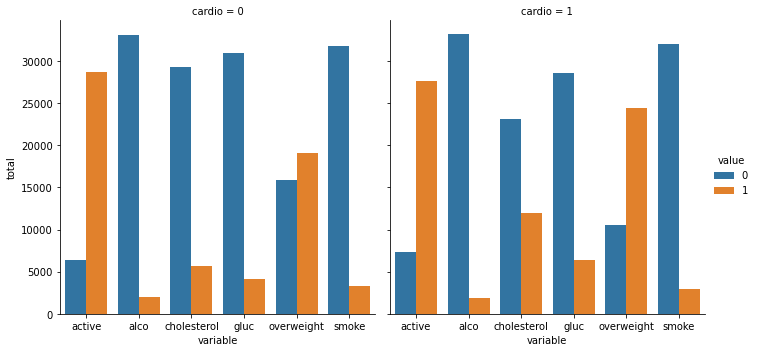

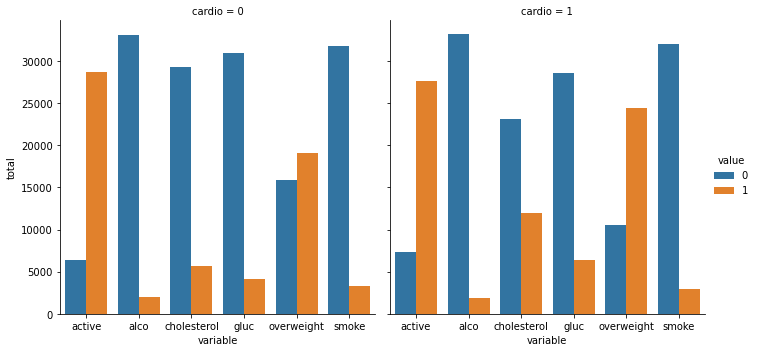

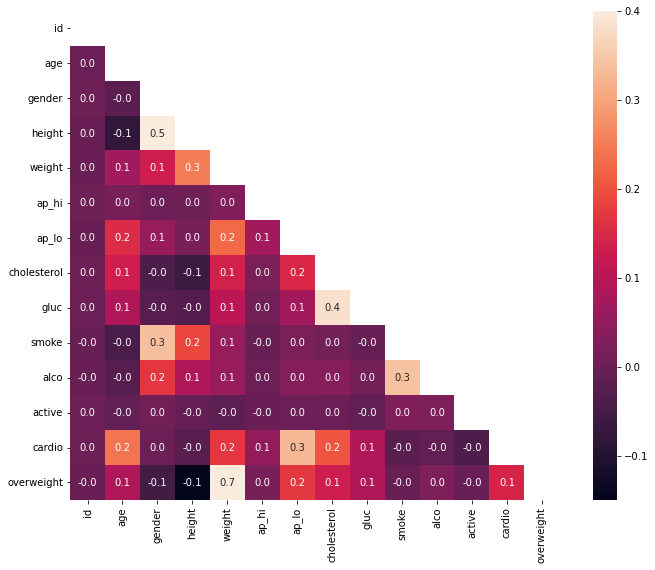

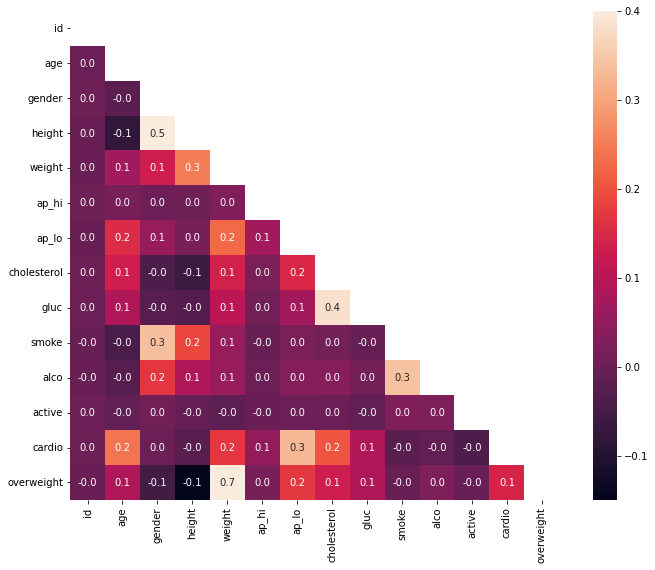

In [23]:
import unittest
class CatPlotTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = draw_cat_plot()
        self.ax = self.fig.axes[0]

    def test_line_plot_labels(self):
        actual = self.ax.get_xlabel()
        expected = "variable"
        self.assertEqual(
            actual, expected, "Expected line plot xlabel to be 'variable'"
        )
        actual = self.ax.get_ylabel()
        expected = "total"
        self.assertEqual(
            actual, expected, "Expected line plot ylabel to be 'total'"
        )
        actual = []
        for label in self.ax.get_xaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = [
            "active",
            "alco",
            "cholesterol",
            "gluc",
            "overweight",
            "smoke",
        ]
        self.assertEqual(
            actual,
            expected,
            "Expected bar plot secondary x labels to be 'active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'",
        )

    def test_bar_plot_number_of_bars(self):
        actual = len(
            [
                rect
                for rect in self.ax.get_children()
                if isinstance(rect, mpl.patches.Rectangle)
            ]
        )
        expected = 13
        self.assertEqual(
            actual, expected, "Expected a different number of bars chart."
        )
class HeatMapTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = draw_heat_map()
        self.ax = self.fig.axes[0]

    def test_heat_map_labels(self):
        actual = []
        for label in self.ax.get_xticklabels():
            actual.append(label.get_text())
        expected = [
            "id",
            "age",
            "gender",
            "height",
            "weight",
            "ap_hi",
            "ap_lo",
            "cholesterol",
            "gluc",
            "smoke",
            "alco",
            "active",
            "cardio",
            "overweight",
        ]
        self.assertEqual(
            actual,
            expected,
            "Expected bar plot legend labels to be months of the year.",
        )

    def test_heat_map_values(self):
        actual = [
            text.get_text()
            for text in self.ax.get_default_bbox_extra_artists()
            if isinstance(text, mpl.text.Text)
        ]
        print(actual)
        expected = [
            "0.0",
            "0.0",
            "-0.0",
            "0.0",
            "-0.1",
            "0.5",
            "0.0",
            "0.1",
            "0.1",
            "0.3",
            "0.0",
            "0.0",
            "0.0",
            "0.0",
            "0.0",
            "0.0",
            "0.2",
            "0.1",
            "0.0",
            "0.2",
            "0.1",
            "0.0",
            "0.1",
            "-0.0",
            "-0.1",
            "0.1",
            "0.0",
            "0.2",
            "0.0",
            "0.1",
            "-0.0",
            "-0.0",
            "0.1",
            "0.0",
            "0.1",
            "0.4",
            "-0.0",
            "-0.0",
            "0.3",
            "0.2",
            "0.1",
            "-0.0",
            "0.0",
            "0.0",
            "-0.0",
            "-0.0",
            "-0.0",
            "0.2",
            "0.1",
            "0.1",
            "0.0",
            "0.0",
            "0.0",
            "0.0",
            "0.3",
            "0.0",
            "-0.0",
            "0.0",
            "-0.0",
            "-0.0",
            "-0.0",
            "0.0",
            "0.0",
            "-0.0",
            "0.0",
            "0.0",
            "0.0",
            "0.2",
            "0.0",
            "-0.0",
            "0.2",
            "0.1",
            "0.3",
            "0.2",
            "0.1",
            "-0.0",
            "-0.0",
            "-0.0",
            "-0.0",
            "0.1",
            "-0.1",
            "-0.1",
            "0.7",
            "0.0",
            "0.2",
            "0.1",
            "0.1",
            "-0.0",
            "0.0",
            "-0.0",
            "0.1",
        ]
        self.assertEqual(
            actual, expected, "Expected differnt values in heat map."
        )
if __name__ == "__main__":
    unittest.main(argv=["first-arg-is-ignored"], exit=False)
